![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

Inicialmente, se desactivan las advertencias para que no aparezcan durante la ejecución del código

In [16]:
import warnings
warnings.filterwarnings('ignore')

Se importan las librerias necesarias para trabajar con los datos y modelar la detección de toxicidad en los comentarios

In [17]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

Se cargan los datos y se seleccionan las columnas id, comment_test y target

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


Se cargan de forma correcta los datos y se muestran las primeras filas para verificar dicha acción. Para obtener la forma de los datos, se usa el atributo shape

In [19]:
df.shape

(541462, 3)

La base de datos Tocixity tiene 541,462 filas y 3 columnas

Para comprender la distribución de las etiquetas de toxicidad en los comentarios se realiza el siguiente histograma de la variable objetivo

<Axes: >

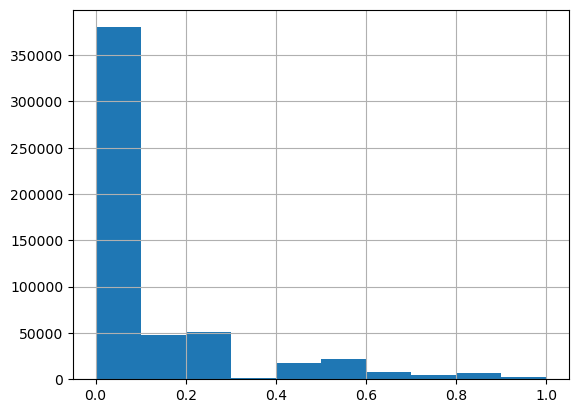

In [20]:
df.target.hist()

Usando el método describe() se obtiene un resumen estadístico de la variable objetivo

In [21]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

Se tienen en total 541,462 comentarios, cuya media en la variable objetivo es aproximadamente 0.103, esto significa que en promedio alrededor del 10% de los comentarios son etiquetados como tóxicos, aunque hay una variabilidad considerable en la distribución de las etiquetas (aproximadamente 0.197). Las etiquetas toman valores en el rango [0, 1]. El 25% de los comentarios tienen una probabilidad de toxicidad de 0, el 50% tienen una probabilidad de toxicidad de 0, y el 75% tienen una probabilidad de toxicidad menor o igual a 0.166667.

Se asigna la columna "comment_text" como variables predictoras X

In [22]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

Utilizando la función train_test_split() de scikit-learn se dividen los datos en conjuntos de entrenamiento y prueba

In [23]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

El código que se presenta a continuación utiliza CountVectorizer para tokenizar los comentarios de entrenamiento y prueba, luego entrena un modelo de regresión XGBoost y calcula el MSE utilizando las predicciones en el conjunto de prueba.

In [24]:
# Celda 1

# Importamos CountVectorizer
vect_A = CountVectorizer()

# Tokenizamos los comentarios de entrenamiento y prueba
X_train_dtm_A = vect_A.fit_transform(X_train)
X_test_dtm_A = vect_A.transform(X_test)

# Creamos y entrenamos el modelo de regresión XGBoost
modelo = XGBRegressor(objective='reg:squarederror')  
modelo.fit(X_train_dtm_A, y_train)

# Predecimos los valores de toxicidad en el conjunto de prueba
y_pred = modelo.predict(X_test_dtm_A)

# Calculamos el Mean Squared Error (MSE)
mse_A = mean_squared_error(y_test, y_pred)
print("MSE Tokenización con CountVectorizer:", mse_A)

MSE Tokenización con CountVectorizer: 0.020689791583810714


El modelo tiene un buen rendimiento en la predicción de la probabilidad de toxicidad de los comentarios en el conjunto de prueba, puesto que, el MSE obtenido usando CountVectorizer para tokenización es aproximadamente 0.0207

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

En el siguiente código se ajusta CountVectorizer para considerar trigramas (combinaciones de tres palabras consecutivas) como parte del proceso de tokenización. Luego, se entrena el mismo modelo de regresión XGBoost y se calcula el MSE utilizando las predicciones en el conjunto de prueba.

In [25]:
# Celda 2

# Importamos CountVectorizer
vect_B = CountVectorizer(ngram_range=(1, 3)) # Utilizamos trigramas

# Tokenizamos los comentarios de entrenamiento y prueba
X_train_dtm_B = vect_B.fit_transform(X_train)
X_test_dtm_B = vect_B.transform(X_test)

# Creamos y entrenamos el mismo modelo de regresión XGBoost
modelo = XGBRegressor(objective='reg:squarederror')
modelo.fit(X_train_dtm_B, y_train)

# Predecimos los valores de toxicidad en el conjunto de prueba
y_pred = modelo.predict(X_test_dtm_B)

# Calculamos el Mean Squared Error (MSE)
mse_B = mean_squared_error(y_test, y_pred)
print("MSE Tokenización con CountVectorizer y trigramas:", mse_B)

MSE Tokenización con CountVectorizer y trigramas: 0.020677312051006345


La inclusión de trigramas no ha tenido un impacto significativo en el rendimiento del modelo en este caso, pues, el MSE obtenido utilizando CountVectorizer con trigramas es aproximadamente 0.0207, teniendo así un rendimiento similar al del punto anterior.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Celda 3

#### Descripción 

El TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency Vectorizer) es una técnica de tokenización o ponderación de características que evalúa la importancia de una palabra en un documento en relación con un corpus (conjunto de textos o documentos que se utilizan como base de datos para análisis lingüísticos). Esta medida considera tanto la frecuencia de una palabra en un documento como su frecuencia inversa en todo el corpus.

#### Funcionamiento

Las palabras que aparecen con alta frecuencia en un documento y en todo el corpus (posibles stopwords) tendrán un TF-IDF bajo, mientras que aquellas palabras que son específicas de ciertos documentos tendrán un valor de IDF mayor.

Lo anterior significa que, el TF-IDF asigna un peso a cada palabra en función de su relevancia en un documento, ayudando a filtrar palabras comunes y resaltar aquellas más significativas. Esto evita la necesidad de ajustar parámetros manualmente, y se enfoca en palabras únicas que aportan información distintiva al texto.

$W_{x,y} = tf_{x,y} * log(N/df_x)$
- TF-IDF: término x en el documento y
- $tf_{x,y}$: frecuencia de x en y
- $df_x$: número de documentos que contienen x
- N: número total de documentos

#### Ventajas

TfidfVectorizer normaliza las características, filtra términos comunes como: "the", "a", "and" que pueden no ser útiles para el análisis y da más peso a los términos que son importantes para un documento específico pero raros en todo el corpus.

#### Desventajas

TfidfVectorizer puede ser más computacionalmente costoso que CountVectorizer debido al cálculo de IDF, para obtener buenos resultados, se requiere un corpus grande y representativo, además, TfidfVectorizer tiene parámetros adicionales que necesitan ser ajustados, como el suavizado de IDF o la norma. 

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

A continuación se uzará TfdidfVectotizer para tokenizar los comentarios de entrenamiento y prueva. Luego, se entrenará el mismo modelo de regresión XGBoost y se calculará el MSE utilizando las predicciones en el conjunto de prueba.

In [26]:
# Celda 4

# Creamos y entrenamos el modelo de regresión utilizando TfidfVectorizer
vect_C = TfidfVectorizer()
X_train_dtm_C = vect_C.fit_transform(X_train)
X_test_dtm_C = vect_C.transform(X_test)

modelo = XGBRegressor(objective='reg:squarederror')  
modelo.fit(X_train_dtm_C, y_train)

# Predecimos los valores de toxicidad en el conjunto de prueba
y_pred = modelo.predict(X_test_dtm_C)

# Calculamos el Mean Squared Error (MSE)
mse_C = mean_squared_error(y_test, y_pred)
print("MSE Tokenización con TfidfVectorizer:", mse_C)

MSE Tokenización con TfidfVectorizer: 0.020335956149285114


El MSE obtenido utilizando TfidfVectorizer para tokenización es aproximadamente 0.0203. Por consiguiente, el modelo sigue teniendo un buen rendimiento en la predicción de la probabilidad de toxicidad de los comentarios en el conjunto de prueba, incluso cuando se utiliza TfidfVectorizer en lugar de CountVectorizer.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

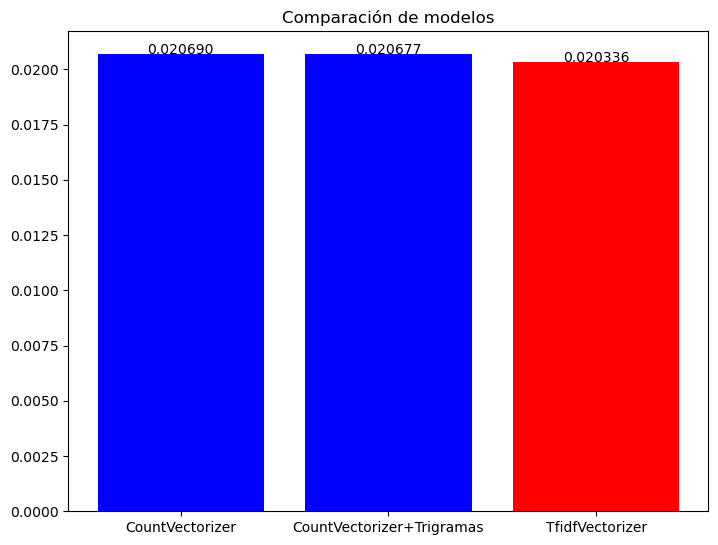

In [33]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Comparación de modelos")
ejeX = ['CountVectorizer', 'CountVectorizer+Trigramas', 'TfidfVectorizer']
ejeY = [mse_A, mse_B, mse_C]

min_rmse_index = ejeY.index(min(ejeY))

colors = ['blue' if i != min_rmse_index else 'red' for i in range(len(ejeY))]

ax.bar(ejeX, ejeY, color=colors)

def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f"{y[i]:.6f}", ha='center')

addlabels(ejeX, ejeY, plt)


plt.show()


Al analizar los resultados de los diferentes modelos, se observa en la gráfica que: la tokenización con TfidfVectorizer produjo el MSE más bajo. Sin embargo, los tres modelos fueron competentes, ya que sus métricas de MSE fueron bastante cercanas.

A pesar de que el CountVectorizer solo cuenta la frecuencia de las palabras en los datos sin tener en cuenta su relevancia mostró un buen desempeño, pero, como se esperaba, fue el peor de los 3 modelos.

El CountVectorizer con trigramas logró bajar aún mas el MSE ya que se están considerando combinaciones de tres palabras consecutivas, a pesar de que el cambio no fue sustancial este modelo demuestra que el uso de trigramas mejora el desmepeño de modelo, aunque se debe tener en cuenta que también aumenta el coste computacional, siendo el modelo que más tiempo tardó en ejecutarse.

Finalmente el modelo TfidfVectorizer mostró el mejor desempeño en el ejercicio, además su coste computacional no fue tan alto. Esto quiere decir que en este caso la evaluación de las palabras en el documento para asignarle un peso específico y poder ponderar su impportancia fue el mejor método para la predicción de los datos.

Es importante señalar que, aunque en este caso el modelo TfidfVectorizer tuvo el mejor desempeño, pueden surgir situaciones en las que CountVectorizer sea más apropiado. Al considerar problemas específicos de tokenización o restricciones de recursos computacionales, sería útil evaluar la conveniencia de utilizar trigramas u otros enfoques de detección de palabras consecutivas.